In [2]:
import numpy
import urllib
import scipy.optimize
import random
from sklearn import linear_model
import gzip
from collections import defaultdict

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [5]:
f = open("5year.arff", 'r')

In [6]:
# Read and parse the data
while not '@data' in f.readline():
    pass

dataset = []
for l in f:
    if '?' in l: # Missing entry
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0 # Convert to bool
    dataset.append(values)

In [7]:
X = [d[:-1] for d in dataset]
y = [d[-1] for d in dataset]

In [8]:
X[1:10]

[[1,
  0.048179,
  0.55041,
  0.10765,
  1.2437,
  -22.959,
  0.0,
  0.05928,
  0.81682,
  1.515,
  0.44959,
  0.09199,
  0.13419,
  0.055575,
  0.05928,
  2386.1,
  0.15297,
  1.8168,
  0.05928,
  0.039129,
  36.074,
  0.99455,
  0.067616,
  0.031802,
  0.0,
  0.4292,
  0.1328,
  2.0671,
  0.23891,
  5.8823,
  0.36331,
  0.039129,
  140.12,
  2.6583,
  2.1336,
  0.3642,
  1.515,
  6.3783,
  0.51225,
  0.2404,
  0.067283,
  0.19828,
  0.044632,
  125.21,
  89.134,
  0.32177,
  0.90475,
  46.538,
  0.042701,
  0.028186,
  0.99819,
  0.44176,
  0.37618,
  0.99779,
  1.1369,
  1.2437,
  0.2404,
  0.10716,
  0.77048,
  0.13938,
  10.118,
  4.095,
  106.43,
  3.4294,
  3.3622],
 [1,
  0.099486,
  0.59991,
  0.37489,
  1.6529,
  19.036,
  0.21084,
  0.12395,
  0.6669,
  1.0972,
  0.40009,
  0.12395,
  0.21587,
  0.082929,
  0.12395,
  1638.2,
  0.22281,
  1.6669,
  0.12395,
  0.076897,
  66.783,
  1.2422,
  0.13452,
  0.061722,
  0.2644,
  0.40009,
  0.18204,
  0.91571,
  7.3601,
  4.2136,
 

In [13]:
y[1:10]

[False, False, False, False, False, False, False, False, False]

In [9]:
answers = {} # Your answers

In [10]:
def accuracy(predictions, y):
    acc = 0
    for i in range(len(y)):
        if predictions[i] == y[i]:
            acc += 1
    return acc/len(y)

In [11]:
def BER(predictions, y):
    TPi = numpy.logical_and(predictions, y)
    FPi = numpy.logical_and(predictions, numpy.logical_not(y))
    TNi = numpy.logical_and(numpy.logical_not(predictions), numpy.logical_not(y))
    FNi = numpy.logical_and(numpy.logical_not(predictions), y)

    TP = sum(TPi)
    FP = sum(FPi)
    TN = sum(TNi)
    FN = sum(FNi)
    ber =  1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
    return ber

In [12]:
### Question 1

In [919]:
mod = linear_model.LogisticRegression(C=1)
mod.fit(X,y)

pred = mod.predict(X)

In [920]:
acc1 = accuracy(pred, y)
#print(acc1)

In [921]:
ber1 = BER(pred, y)
#print(ber1)

In [922]:
answers['Q1'] = [acc1, ber1] # Accuracy and balanced error rate

In [923]:
assertFloatList(answers['Q1'], 2)

In [924]:
### Question 2

In [925]:
mod = linear_model.LogisticRegression(C=1, class_weight='balanced')
mod.fit(X,y)

pred = mod.predict(X)

In [926]:
acc2 = accuracy(pred, y)
#print(acc2)

In [927]:
ber2 = BER(pred, y)
#print(ber2)

In [928]:
answers['Q2'] = [acc2, ber2]

In [929]:
assertFloatList(answers['Q2'], 2)

In [930]:
### Question 3

In [931]:
random.seed(3)
random.shuffle(dataset)

In [932]:
X = [d[:-1] for d in dataset]
y = [d[-1] for d in dataset]

In [933]:
Xtrain, Xvalid, Xtest = X[:len(X)//2], X[len(X)//2:(3*len(X))//4], X[(3*len(X))//4:]
ytrain, yvalid, ytest = y[:len(X)//2], y[len(X)//2:(3*len(X))//4], y[(3*len(X))//4:]

In [934]:
len(Xtrain), len(Xvalid), len(Xtest)

(1515, 758, 758)

In [935]:
mod = linear_model.LogisticRegression(C=1, class_weight='balanced')
mod.fit(Xtrain,ytrain)

pred_train = mod.predict(Xtrain)
pred_valid = mod.predict(Xvalid)
pred_test = mod.predict(Xtest)

In [936]:
berTrain = BER(pred_train, ytrain)
print(berTrain)
berValid = BER(pred_valid, yvalid)
print(berValid)
berTest = BER(pred_test, ytest)
print(berTest)

0.29287226079549855
0.3159203980099503
0.2585616438356164


In [937]:
answers['Q3'] = [berTrain, berValid, berTest]

In [938]:
assertFloatList(answers['Q3'], 3)

In [939]:
### Question 4

In [940]:
C = [10**i for i in range(-4,5)]
print(C)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


In [941]:
berList = []
for c in C:
   mod = linear_model.LogisticRegression(C=c, class_weight='balanced')
   mod.fit(Xtrain,ytrain)
   pred_valid = mod.predict(Xvalid)
   berValid = BER(pred_valid, yvalid)
   berList.append(berValid)
print(berList)

[0.32677521483491634, 0.31931252826775225, 0.32948891904115785, 0.3233830845771144, 0.3159203980099503, 0.3111714156490276, 0.2955030044582283, 0.29618143050978873, 0.29618143050978873]


In [942]:
answers['Q4'] = berList

In [943]:
assertFloatList(answers['Q4'], 9)

In [944]:
### Question 5

In [945]:
acc_train = []
acc_test = []
acc_valid = []
ber_train = []
ber_test = []
ber_valid = []
ber_C = {}

for c in C:
   mod = linear_model.LogisticRegression(C=c, class_weight='balanced')
   mod.fit(Xtrain,ytrain)
   pred_train = mod.predict(Xtrain)
   pred_valid = mod.predict(Xvalid)
   pred_test = mod.predict(Xtest)
   acc_train.append(accuracy(pred_train,ytrain))
   acc_test.append(accuracy(pred_test,ytest))
   acc_valid.append(accuracy(pred_valid,yvalid))
   ber_train.append(BER(pred_train,ytrain))
   ber_test.append(BER(pred_test, ytest))
   ber_valid.append(BER(pred_valid, yvalid))
   ber_C[BER(pred_valid, yvalid)]=c

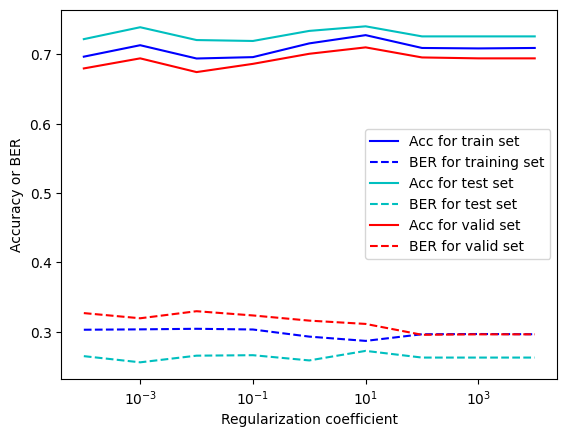

In [946]:
import matplotlib.pyplot as plt

plt.plot(C, acc_train, 'b-', label='Acc for train set')
plt.plot(C, ber_train, 'b--', label='BER for training set')
plt.plot(C, acc_test, 'c-', label='Acc for test set')
plt.plot(C, ber_test, 'c--', label='BER for test set')
plt.plot(C, acc_valid, 'r-', label='Acc for valid set')
plt.plot(C, ber_valid, 'r--', label='BER for valid set')

plt.legend()
plt.xlabel('Regularization coefficient')
plt.xscale('log')
plt.ylabel('Accuracy or BER')
plt.show()

In [947]:
ber_valid.sort()
for ber in ber_valid:
    print(ber_C[ber],ber)

bestC = C[6]
print(bestC)
ber5 = ber_valid[6]
print(ber5)

100 0.2955030044582283
10000 0.29618143050978873
10000 0.29618143050978873
10 0.3111714156490276
1 0.3159203980099503
0.001 0.31931252826775225
0.1 0.3233830845771144
0.0001 0.32677521483491634
0.01 0.32948891904115785
100
0.3233830845771144


In [948]:
answers['Q5'] = [bestC, ber5]

In [949]:
assertFloatList(answers['Q5'], 2)

In [950]:
### Question 6

In [951]:
f = gzip.open("young_adult_10000.json.gz")
dataset = []
for l in f:
    dataset.append(eval(l))

In [952]:
dataTrain = dataset[:9000]
dataTest = dataset[9000:]

In [953]:
print(dataset[0])

{'user_id': '8842281e1d1347389f2ab93d60773d4d', 'book_id': '2767052', 'review_id': '248c011811e945eca861b5c31a549291', 'rating': 5, 'review_text': "I cracked and finally picked this up. Very enjoyable quick read - couldn't put it down - it was like crack. \n I'm a bit bothered by the lack of backstory of how Panem and the Hunger Games come about. It is just kind of explained away in a few paragraphs and we are left to accept this very strange world where teenagers are pitted into an arena each year to kill each other? I was expecting it because I've seen Battle Royale, but I would have appreciated knowing more of the backstory of how the world could have come into such a odd state. \n I suppose what makes a book like this interesting is thinking about the strategy of it all. The players are going to be statistically encouraged to band together because they will last longer that way, but by definition of course any partnership will be broken, and the drama of how that unfolds is always 

In [954]:
# Some data structures you might want

usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)
ratingDict = {} # To retrieve a rating for a specific user/item pair

for d in dataTrain:
    usersPerItem[d['book_id']].add(d['user_id'])
    itemsPerUser[d['user_id']].add(d['book_id'])
    reviewsPerUser[d['user_id']].append(d)
    reviewsPerItem[d['book_id']].append(d)


#print(usersPerItem)
#print(itemsPerUser)

In [955]:
def Jaccard(s1, s2):
    numerator = len(s1.intersection(s2))
    denominator = len(s1.union(s2))
    if denominator==0:
        return 0
    return numerator/denominator

In [956]:
def mostSimilar(i, N):
    rate=[]
    rate_book_dict = {}
    for book in usersPerItem.keys():
      if book != i:
        score = Jaccard(usersPerItem[i],usersPerItem[book])
        rate_book_dict[score]=book
        rate.append(score)
    rate.sort()
    #print(rate[0],rate[-1],rate_book_dict[rate[-1]])
    result = []
    for i in range(1,N+1):
        result.append([rate[-i],rate_book_dict[rate[-i]]])
    return result

In [957]:
print(mostSimilar('2767052', 10))

[[0.4125, '6148028'], [0.3411764705882353, '7260188'], [0.1590909090909091, '256683'], [0.1375, '1162543'], [0.11494252873563218, '11735983'], [0.10989010989010989, '13335037'], [0.10810810810810811, '28187'], [0.10666666666666667, '428263'], [0.09876543209876543, '49041'], [0.09782608695652174, '41865']]


In [958]:
answers['Q6'] = mostSimilar('2767052', 10)

In [959]:
assert len(answers['Q6']) == 10
assertFloatList([x[0] for x in answers['Q6']], 10)

In [960]:
### Question 7

In [961]:
ratingMean = sum([d['rating'] for d in dataset])/len(dataset)

usersAverages = {}
booksAverages = {}

#average(Ru)
for user in reviewsPerUser.keys():
    usersAverages[user]=sum(d['rating'] for d in reviewsPerUser[user])/len(reviewsPerUser[user])

#average(Ri)
for item in reviewsPerItem.keys():
    booksAverages[item]=sum(d['rating'] for d in reviewsPerItem[item])/len(reviewsPerItem[item])


def predictRating_Jaccard(user,item):
    ratings = []
    similarities = []
    for d in reviewsPerUser[user]:
        j = d['book_id']
        if j != item:
          ratings.append(d['rating'] - booksAverages[j])
          similarities.append(Jaccard(usersPerItem[item],usersPerItem[j]))
    if (sum(similarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,similarities)]
        return booksAverages[item] + sum(weightedRatings) / sum(similarities)
    else:
        # User hasn't rated any similar items
        return ratingMean

In [962]:
ratings_data = []
ratings_pred = []
for d in dataTest:
    ratings_data.append(d['rating'])
    ratings_pred.append(predictRating_Jaccard(d['user_id'],d['book_id']))

mse7 = numpy.square(numpy.subtract(numpy.array(ratings_data),numpy.array(ratings_pred))).mean()
print(mse7)

1.243812045890036


In [963]:
answers['Q7'] = mse7

In [964]:
assertFloat(answers['Q7'])

In [965]:
### Question 8

In [966]:
def predictRating_Jaccard_interchange(user,item):
    ratings = []
    similarities = []
    for d in reviewsPerItem[item]:
        v = d['user_id']
        if v != user:
          ratings.append(d['rating'] - usersAverages[v])
          similarities.append(Jaccard(itemsPerUser[user],itemsPerUser[v]))
    if (sum(similarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,similarities)]
        return usersAverages[user] + sum(weightedRatings) / sum(similarities)
    else:
        # User hasn't rated any similar items
        return ratingMean

In [967]:
ratings_data = []
ratings_pred = []
for d in dataTest:
    ratings_data.append(d['rating'])
    ratings_pred.append(predictRating_Jaccard_interchange(d['user_id'],d['book_id']))

mse8 = numpy.square(numpy.subtract(numpy.array(ratings_data),numpy.array(ratings_pred))).mean()
print(mse8)

1.2411643259434213


In [968]:
answers['Q8'] = mse8
assertFloat(answers['Q8'])

In [969]:
f = open("answers_hw2.txt", 'w')
f.write(str(answers) + '\n')
f.close()